# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [3]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [4]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Plot the training data

The points is to see that there is a strong trend that our model should learn to reproduce.

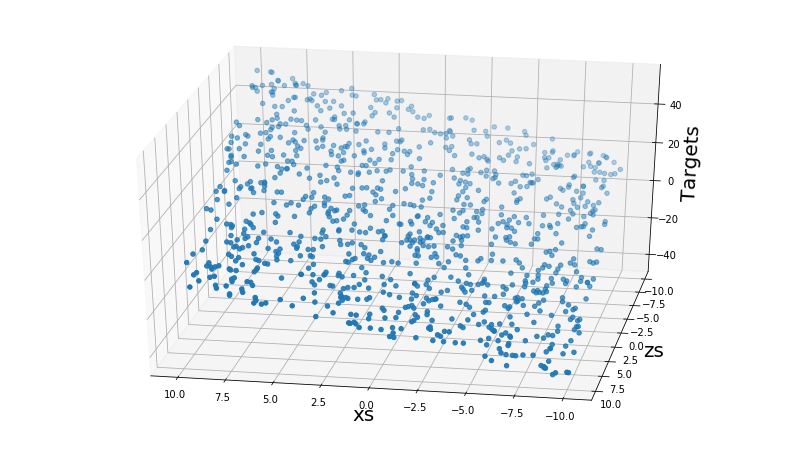

In [8]:
targets = targets.reshape(observations)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs,zs,targets)
ax.set_xlabel('xs', fontsize=20)
ax.set_ylabel('zs', fontsize=20)
ax.set_zlabel('Targets', fontsize=20)
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Inicialize variables

In [9]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)

print(weights,'\n')
print(biases)

[[0.09124727]
 [0.09906752]] 

[-0.02889914]


### Set a learning rate

In [10]:
learning_rate = 0.02

### Train the model

In [17]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(pow(deltas,2)) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

0.17458743691301126
0.17443214475043756
0.17428299675980827
0.17413974984547576
0.17400217052993008
0.17387003457325506
0.17374312660764174
0.17362123978636018
0.17350417544662128
0.17339174278577724
0.17328375855033312
0.17318004673726306
0.17308043830714306
0.17298477090863495
0.17289288861387053
0.1728046416643054
0.17271988622662815
0.17263848415832694
0.17256030278253195
0.17248521467176595
0.1724130974402504
0.17234383354442956
0.17227731009138728
0.17221341865484255
0.17215205509842652
0.17209311940595082
0.17203651551839227
0.17198215117732538
0.17192993777455198
0.17187979020767874
0.1718316267414091
0.17178536887432277
0.17174094121092776
0.17169827133877266
0.17165728971042216
0.1716179295301022
0.1715801266448294
0.17154381943984912
0.1715089487382088
0.17147545770430675
0.17144329175125544
0.17141239845191084
0.17138272745342129
0.1713542303951581
0.1713268608298925
0.17130057414809158
0.17127532750520938
0.17125107975185452
0.17122779136672175
0.17120542439217507
0.171183

### Print weights and biases and see if we have worked correctly.

In [18]:
print(weights,'\n\n',biases)

[[ 2.00097839]
 [-3.00221901]] 

 [4.96206876]


### Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.<br />
The closer this plot is to a 45 degree line, the closer target and output values are.

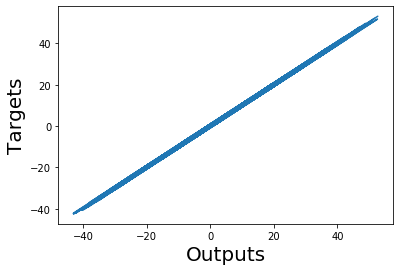

In [19]:
plt.plot(outputs,targets)
plt.xlabel('Outputs', fontsize=20)
plt.ylabel('Targets', fontsize=20)
plt.show()